In [1]:
from PIL import Image
import json
import os
from matplotlib import pyplot

In [2]:
root_dir = '/home/dominik/Development/clevr-dataset-gen/output/'
image_dir = os.path.join(root_dir, 'images')
scenes_dir = os.path.join(root_dir, 'scenes')
image_name = 'CLEVR_FULL-AMBIGOUS_000000'

In [3]:
with open(os.path.join(scenes_dir, image_name + '.json'), encoding='utf-8') as f:
    scene = json.load(f)

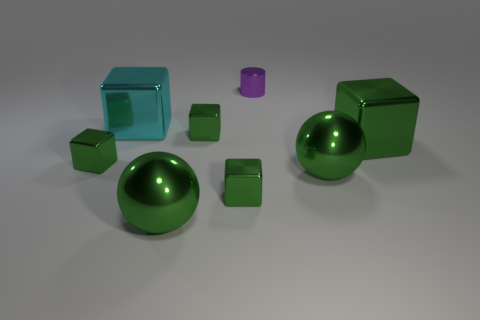

In [4]:

image = Image.open(os.path.join(image_dir, image_name + '.png'))
image

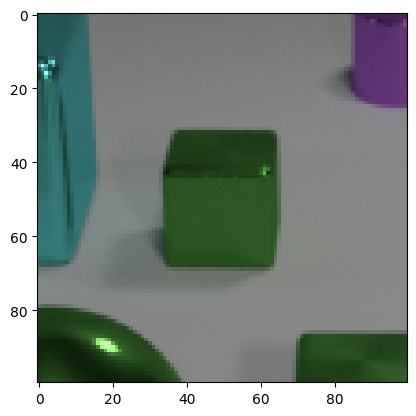

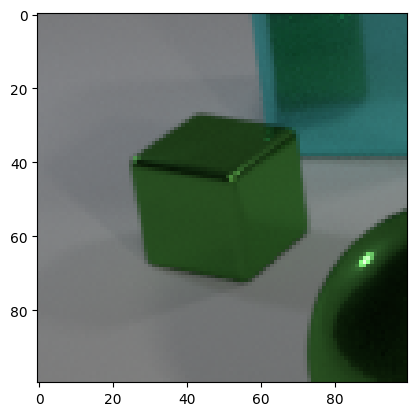

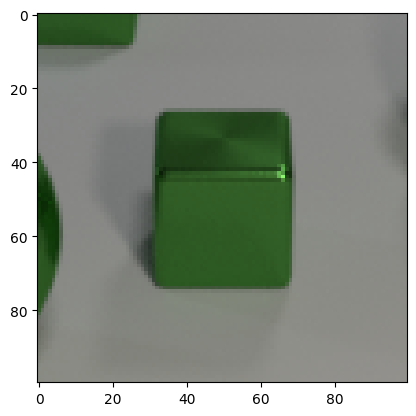

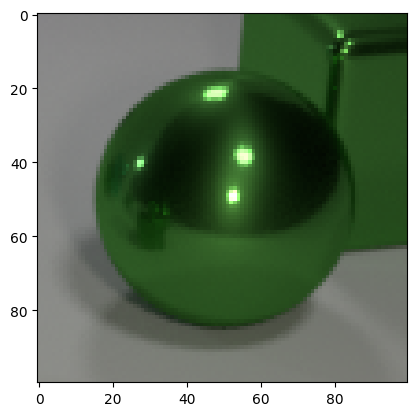

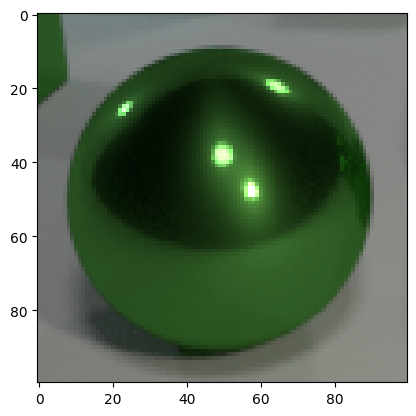

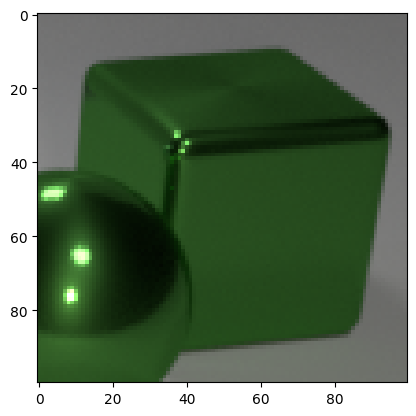

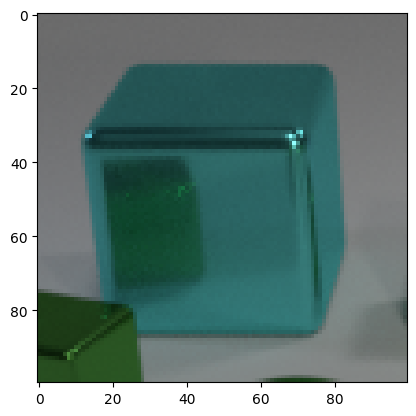

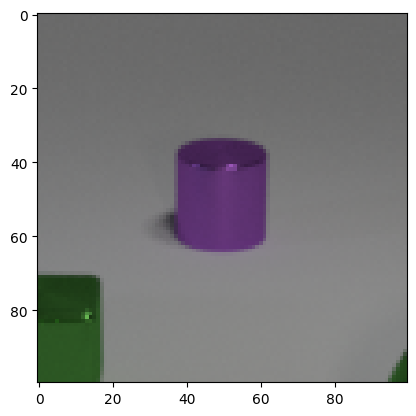

In [5]:
BOUNDING_BOX_SIZE = 100

object_bounding_boxes = []
for object in scene['objects']:
    x_center, y_center, depth = object['pixel_coords']
    object_bounding_boxes.append(image.crop(
        (x_center - BOUNDING_BOX_SIZE/2,
         y_center - BOUNDING_BOX_SIZE/2,
         x_center + BOUNDING_BOX_SIZE/2,
         y_center + BOUNDING_BOX_SIZE/2)
         ))

for image in object_bounding_boxes:
    pyplot.imshow(image)
    pyplot.show()

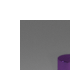

In [6]:
new = image.crop((-20,-20, 50,50))
new.size
new

In [12]:
from torchvision.models.resnet import resnet50, ResNet50_Weights
from torch import nn

resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

adapted_resnet = nn.Sequential(*list(resnet.children())[:-2])
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 